# Cнижение расходов — отказ от невыгодных источников трафика

Необходимо помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.
Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши
- выгрузка всех заказов за этот период
- статистика рекламных расходов.

Предстоит изучить: как клиенты пользуются сервисом, когда делают первые покупки на сайте,сколько денег приносит компании каждый клиент, когда расходы на привлечение клиента окупаются.
Выручка измеряется в условных единицах — у.е.

## Изучение данных из файла

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import warnings 
from scipy import stats as st
import seaborn as sns
warnings.filterwarnings('ignore')

def read(data):  #<функция вывода таблиц>
    display(data.head(10))
    print('Содержание пропусков:')
    print(data.isnull().sum())
    print('')
    print('Количество дубликатов: ', data.duplicated().sum())
    print('')
    print(data.info())
    
df_visits = pd.read_csv('/datasets/visits_log.csv')
df_orders = pd.read_csv('/datasets/orders_log.csv')
df_costs = pd.read_csv('/datasets/costs.csv')

datas = [df_visits, df_orders, df_costs]

datas_name = ['информация о визитах',
              'информация о заказах', 
              'информация о расходах']

for i,j in zip(datas, datas_name) : 
    print(j)
    read(i)
    print('')

информация о визитах


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


Содержание пропусков:
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Количество дубликатов:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

информация о заказах


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


Содержание пропусков:
Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Количество дубликатов:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

информация о расходах


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


Содержание пропусков:
source_id    0
dt           0
costs        0
dtype: int64

Количество дубликатов:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None



В таблицах *df_orders* и *df_visits* изменим названия колонок:

In [2]:
df_visits = df_visits.rename(columns={'Device': 'device', 
                                      'End Ts': 'end_ts', 
                                      'Source Id':'source_id', 
                                      'Start Ts':'start_ts',
                                      'Uid':'uid'})
df_orders = df_orders.rename(columns={'Buy Ts': 'buy_ts', 
                                      'Revenue':'revenue',
                                      'Uid':'uid'})

Пропуски, как и дубликаты отсутствуют, однако в каждой таблице есть одна проблема: все даты представлены неправильным типом. Приведем данные в столбцах к правильному типу и выведем информацию о дата фреймах, чтоб убедиться, что все выполнилось верно. 

In [3]:
date_columns = ['end_ts', 'start_ts']
for i in date_columns:
    df_visits[i] = pd.to_datetime(df_visits[i], format='%Y-%m-%d %H:%M:%S')
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
df_costs['dt'] = pd.to_datetime(df_costs['dt'], format='%Y-%m-%d')

for i,j in zip(datas, datas_name) : 
    print(j)
    print(i.info())
    print('')

информация о визитах
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

информация о заказах
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

информация о расходах
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None



**Вывод:**

Полученные данные полностью соответствуют необходимым требованиям, а значит их в полной мере можно использовать для анализа.

## Рассчет метрик и построение графиков
### Продуктовые метрики
#### Расчет DAU, MAU и WAU

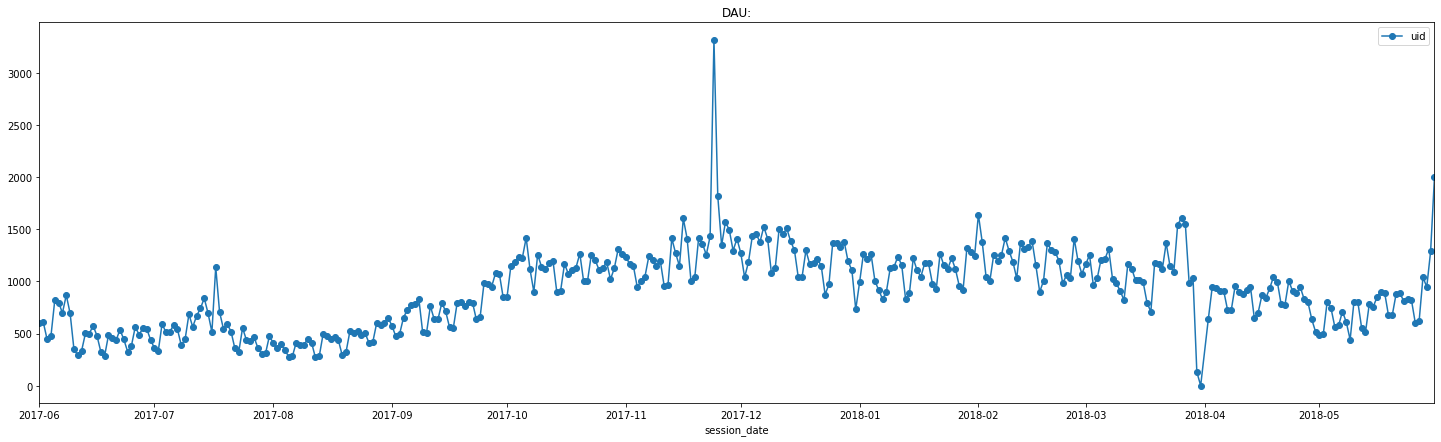

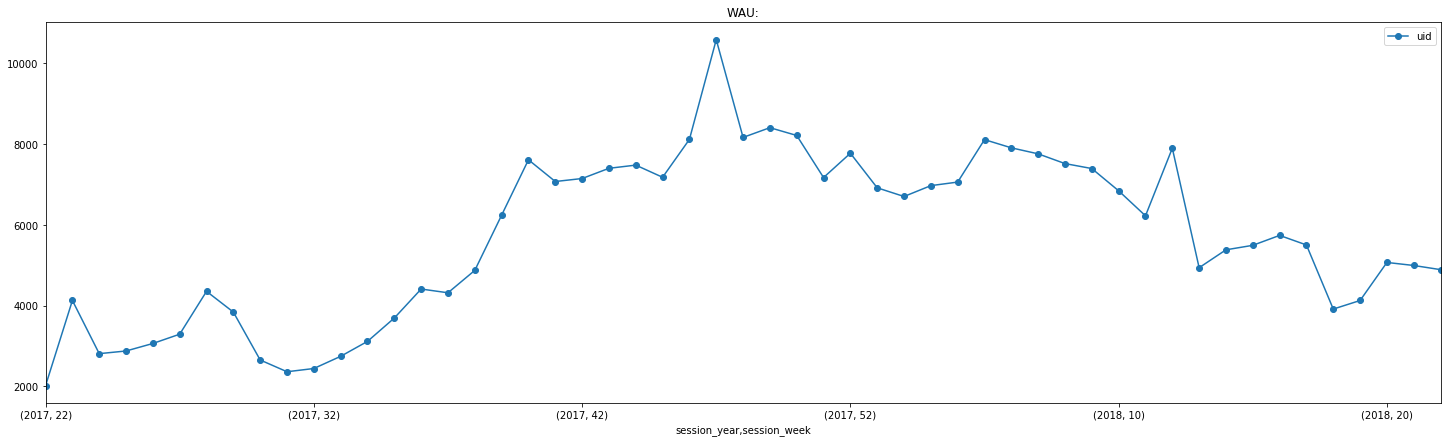

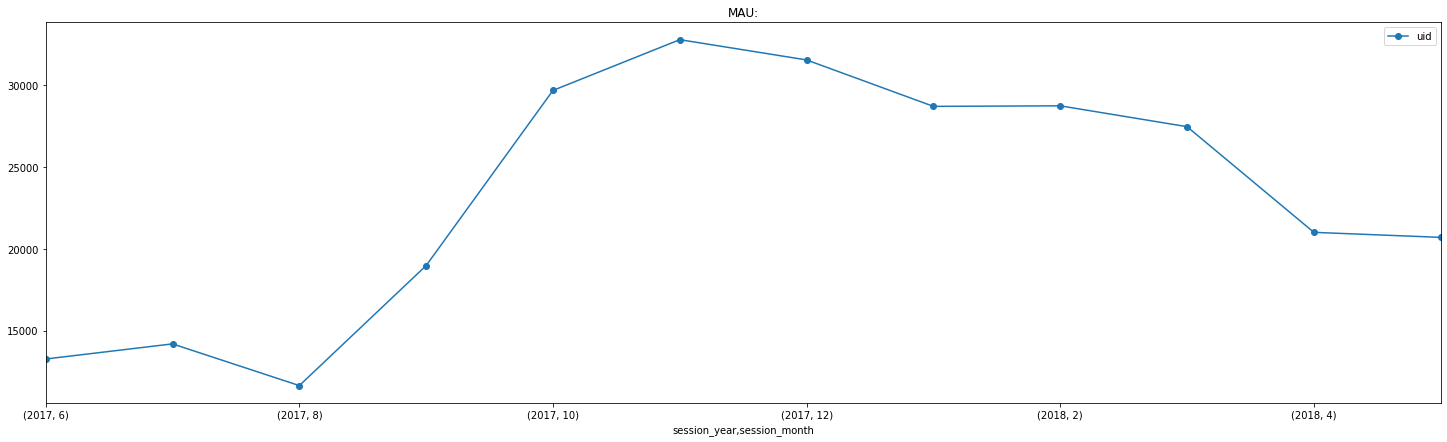

In [4]:
df_visits['session_year'] = df_visits['start_ts'].dt.year
df_visits['session_month'] = df_visits['start_ts'].dt.month
df_visits['session_week'] = df_visits['start_ts'].dt.week
df_visits['session_date'] = df_visits['start_ts'].dt.date

dau = df_visits.groupby('session_date').agg({'uid': 'nunique'})
wau = df_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
mau = df_visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})

activity_users_datas = [dau, wau, mau]
activity_users_names = ['DAU:', 'WAU:', 'MAU:']
for i,j in zip(activity_users_datas, activity_users_names) : 
    i.plot(y= 'uid', style='o-', figsize=(25,7))
    plt.title(j)

In [5]:
for i,j in zip(activity_users_datas, activity_users_names) : 
    print(j, int(i['uid'].mean()))

DAU: 907
WAU: 5716
MAU: 23228


В целом показатели хорошие, особо наблюдается сильный подъем в декабре 2017 года

#### Сколько раз за день пользователи в среднем заходят на сайт

Чтоб найти эту метрику, разделим число сессий на количество пользователей за период

Пользователи в среднем заходят на сайт: 1.082169644003972


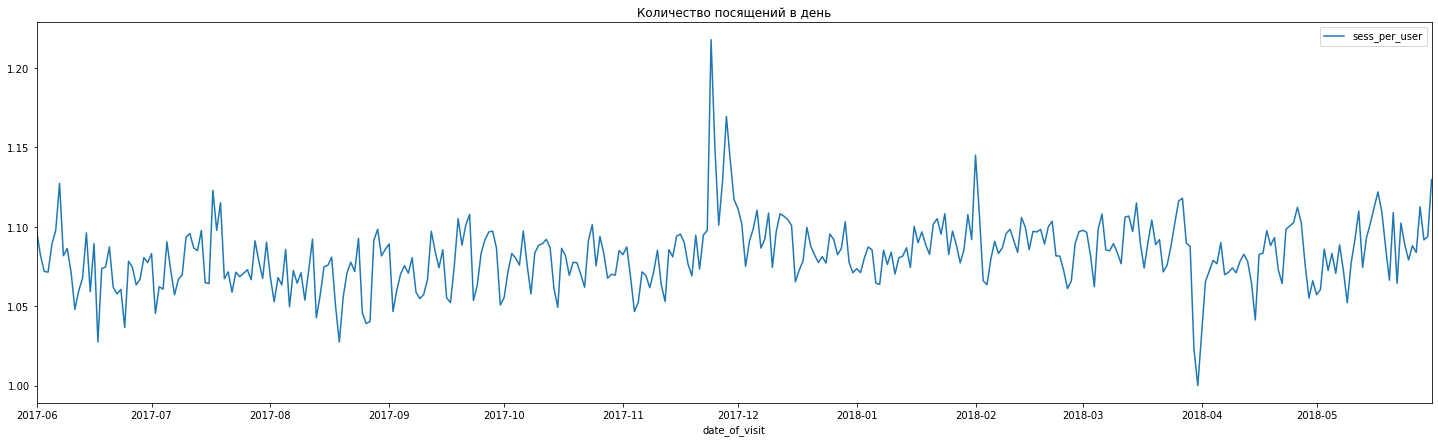

In [6]:
df_visits['date_of_visit'] = df_visits['start_ts'].dt.date
ses_per_user = df_visits.groupby('date_of_visit').agg({'uid': ['count','nunique']})
ses_per_user.columns = ['n_sessions', 'n_users']
ses_per_user['sess_per_user'] = ses_per_user['n_sessions'] / ses_per_user['n_users']
ses_per_user.plot(y= 'sess_per_user', style='-', figsize=(25,7))
plt.title('Количество посящений в день')
print('Пользователи в среднем заходят на сайт:', ses_per_user['sess_per_user'].mean())

Количество посящений в день в среднем составляет один раз.

#### Продолжительность типичной пользовательской сессии

Найдём ASL — посчитаем длину всех сессий, а потом, с учетом распределения, выберем какую характеристику будем считать: среднее, моду или мидиану. 

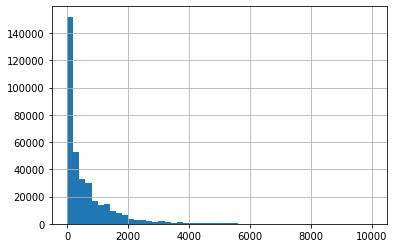

In [7]:
df_visits['ses_dur_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
df_visits['ses_dur_sec'].hist(bins = 50, range=(0,10000))

Так как у нас распределение, которое не нормальное и даже не близко к нему, будем использовать моду. 

In [8]:
print(df_visits['ses_dur_sec'].mode())

0    60
dtype: int64


Типичная пользовательская сессия составляет 60 секунд, что довольно таки не много. 

#### Retention Rate
Для расчета этой метрики используем когортный анализ, когорты сформируем по месяцам. Найдем Retention Rate по заказам и по визитам. Сначала посмотрим на Retention Rate по покупкам, а потом по визитам пользователей. 

In [9]:
first_activity_date = df_orders.groupby(['uid'])['buy_ts'].min()
first_activity_date.name = 'first_activity_date'
df_orders = df_orders.join(first_activity_date, on='uid')
df_orders['first_order_month'] = df_orders['first_activity_date'].astype(
    'datetime64[M]'
)
df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')
df_orders['cohort_lifetime'] = (
    df_orders['order_month'] - df_orders['first_order_month']
)
df_orders['cohort_lifetime'] = df_orders[
    'cohort_lifetime'
] / np.timedelta64(1, 'M') 
df_orders['cohort_lifetime'] = df_orders['cohort_lifetime'].round().astype('int')
cohorts = df_orders.groupby(['first_order_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_order_month', 'uid']
]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
cohorts = cohorts.merge(initial_users_count,on='first_order_month') 
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)

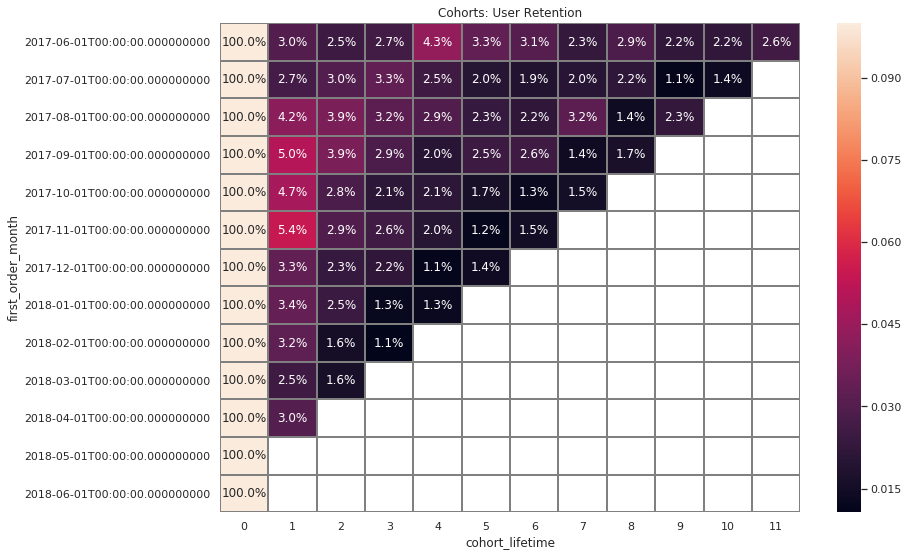

In [10]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1); 

Повторные покупки пользователи совершают очень редко: что, конечно, является плохим показателем. 

Посмотрим на эту метрику со стороны посящения сайта:

In [11]:
first_activity_date2 = df_visits.groupby(['uid'])['start_ts'].min()
first_activity_date2.name = 'first_activity_date'
df_visits = df_visits.join(first_activity_date2, on='uid')
df_visits['first_order_month'] = df_visits['first_activity_date'].astype(
    'datetime64[M]'
)
df_visits['order_month'] = df_visits['start_ts'].astype('datetime64[M]')
df_visits['cohort_lifetime'] = (
    df_visits['order_month'] - df_visits['first_order_month']
)
df_visits['cohort_lifetime'] = df_visits[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'].round().astype('int') 
cohorts2 = df_visits.groupby(['first_order_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count2 = cohorts2[cohorts2['cohort_lifetime'] == 0][
    ['first_order_month', 'uid']
]
initial_users_count2 = initial_users_count2.rename(columns={'uid':'cohort_users'}) 
cohorts2 = cohorts2.merge(initial_users_count2,on='first_order_month') 
cohorts2['retention'] = cohorts2['uid'] / cohorts2['cohort_users'] 
retention_pivot2 = cohorts2.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)

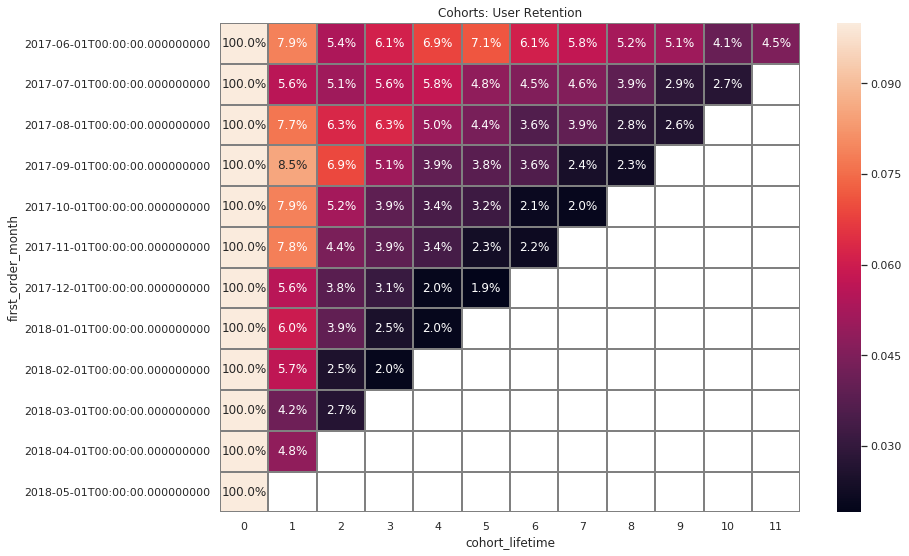

In [12]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot2, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1); 

Пользователи охотнее возвращаются на сайт, нежели совершают повторные покупки, однако все равно показатели очень низкие

**Вывод:**

Найденный Retention Rate очень низкий, как по покупкам, так и по визитам, как не крути, но это значит, что пользователи почти не возвращаются на сервис. 

Средний Retention Rate по покупкам на второй месяц составляет: 2,7%

Средний Retention Rate по визитам на второй месяц составляет: 4,6%

### Метрики электронной коммерции
#### Время с момента первого посещения сайта до совершения покупки

In [13]:
df_buy = pd.DataFrame({'uid': df_orders['uid'], 
                       'buy_time': df_orders['buy_ts'], 
                       'date': df_orders['buy_ts'].dt.date})
df_start = pd.DataFrame({'uid': df_visits['uid'], 
                         'start_time': df_visits['start_ts'], 
                         'date': df_visits['start_ts'].dt.date})
df_buy = df_buy.merge(df_start, on = ['uid', 'date'])
df_buy['time_spend'] = (df_buy['buy_time'] - df_buy['start_time']).dt.seconds

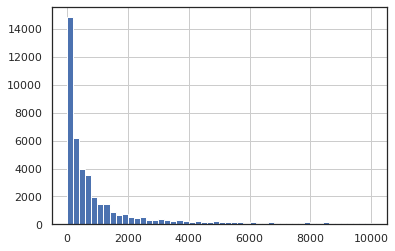

In [14]:
df_buy['time_spend'].hist(bins = 50, range=(0,10000))

Имеется сильный пик около нуля, дальше наблюдается резкий спад, после чего, скорее всего наблюдаются выбросы: например, человек открыл вкладку и забыл про нее, а она долго висела открытой. Это означает, что для расчета типичного времени с момента первого посещения сайта до совершения покупки будем ореинтироваться на моду. 

In [15]:
(df_buy['time_spend'].mode())

0    60
dtype: int64

Полученное значение равно 60 и совпадает с типичной длиной пользовательской сессии, что очень даже логично. 

#### Среднее количество покупок на одного покупателя за последние 6 месяцев

In [16]:
df_buy_query = df_buy[df_buy['buy_time'] > '2018-01-01 00:00:00']
mean_orders_per_user = df_buy_query['uid'].value_counts().mean()
mean_orders_per_user

1.6958675442763114

На одного пользователя приходится 1,6 покупок. 

#### Средний чек
Составим средние чеки по месецам: 

In [17]:
df_mean_bill = df_orders.groupby('order_month').agg({'uid':'count', 'revenue':'sum'})
df_mean_bill = df_mean_bill.reset_index()
df_mean_bill['bill'] = df_mean_bill['revenue'] / df_mean_bill['uid']
df_mean_bill

,order_month,uid,revenue,bill
0,2017-06-01,2354,9557.49,4.060106
1,2017-07-01,2363,12539.47,5.306589
2,2017-08-01,1807,8758.78,4.847139
3,2017-09-01,3387,18345.51,5.416448
4,2017-10-01,5679,27987.70,4.928280
5,2017-11-01,5659,27069.93,4.783518
6,2017-12-01,6218,36388.60,5.852139
7,2018-01-01,4721,19417.13,4.112927
8,2018-02-01,5281,25560.54,4.840095
9,2018-03-01,5326,28834.59,5.413930


Получены средние чеки за месяцы использования, построим график изменения во времени:

Text(0.5, 1.0, 'Средний чек измененный по месяцам')

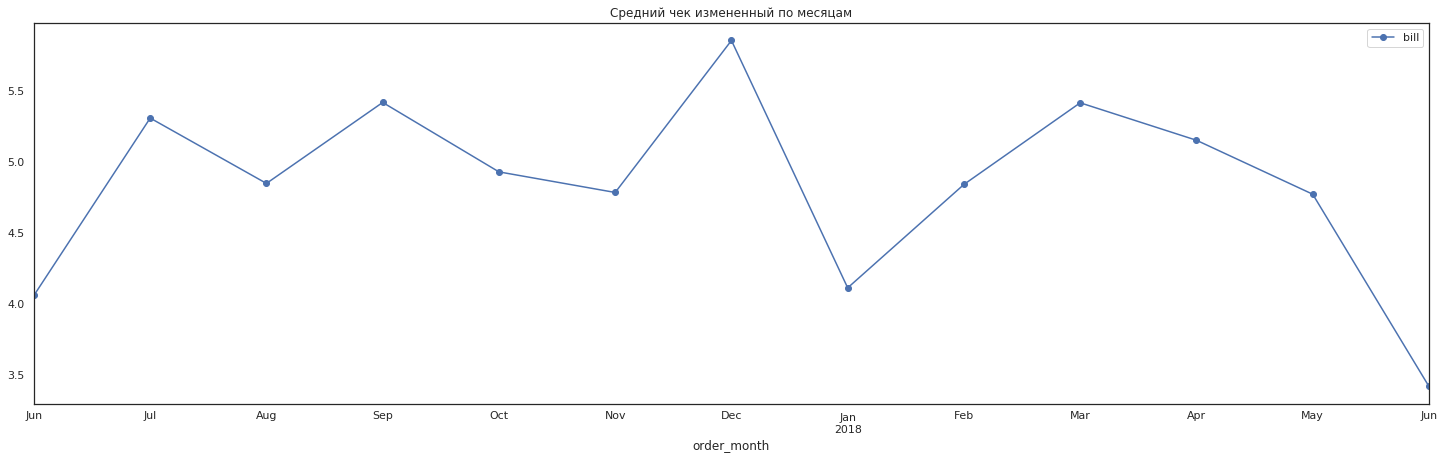

In [18]:
df_mean_bill.plot(y= 'bill', x = 'order_month', style='-o', figsize=(25,7))
plt.title('Средний чек измененный по месяцам')

#### LTV

Расчитаем LTV для когорот.  

In [19]:
first_orders = df_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']

margin_rate = 1

orders_first_month = pd.merge(df_orders,first_orders, on='uid')
cohorts = (
    orders_first_month.groupby(['first_order_month_x', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts = cohorts.rename(columns={'first_order_month_x': 'first_order_month'})
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report['gp'] =  report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']
result = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round()
result = result.cumsum(axis=1)

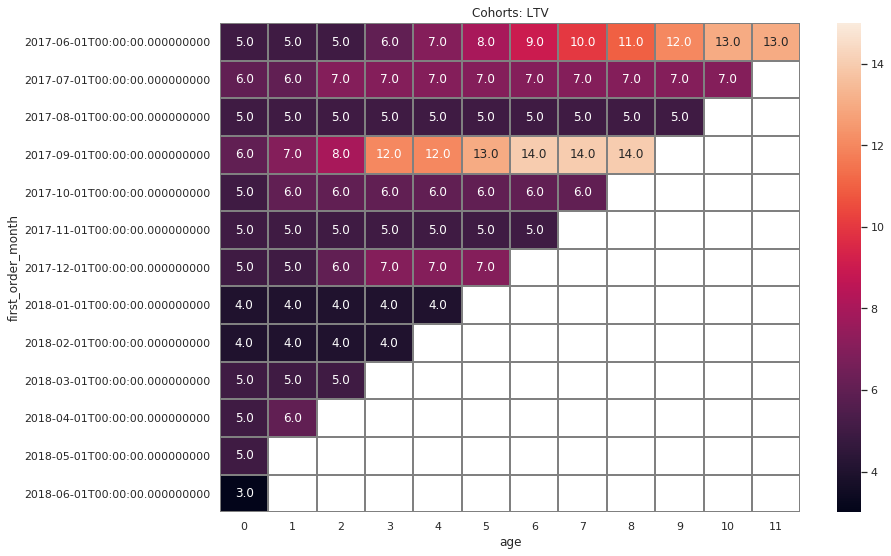

In [20]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
sns.heatmap(result, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmax=15); 

Особо сильно выделяются первая и четвертая когорты. Пользователи от туда оставляют наибольную сумму денег со всех своих покупок

Посчитаем средний LTV за 6 месяцев:

In [21]:
m6_cum_ltv = result.mean(axis=0)[5]
m6_cum_ltv

7.285714285714286

Именно столько денег могут тратить маркетологи на привлечение одного покупателя, если хотят, чтобы реклама окупилась за 6 месяцев.

### Маркетинговые метрики
#### общая сумма расходов на маркетинг

In [22]:
print('Общая сумма расходов на рекламу составляет: ', df_costs['costs'].sum())
cost_per_sourse = df_costs.groupby('source_id')['costs'].sum()
display(cost_per_sourse)

Общая сумма расходов на рекламу составляет:  329131.62


source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

Посмотрим, как менялся этот показатель во времени: сгрупируем по месяцу проведения рекламной компании, в соответствии с этим выведем график изменения расходов. 

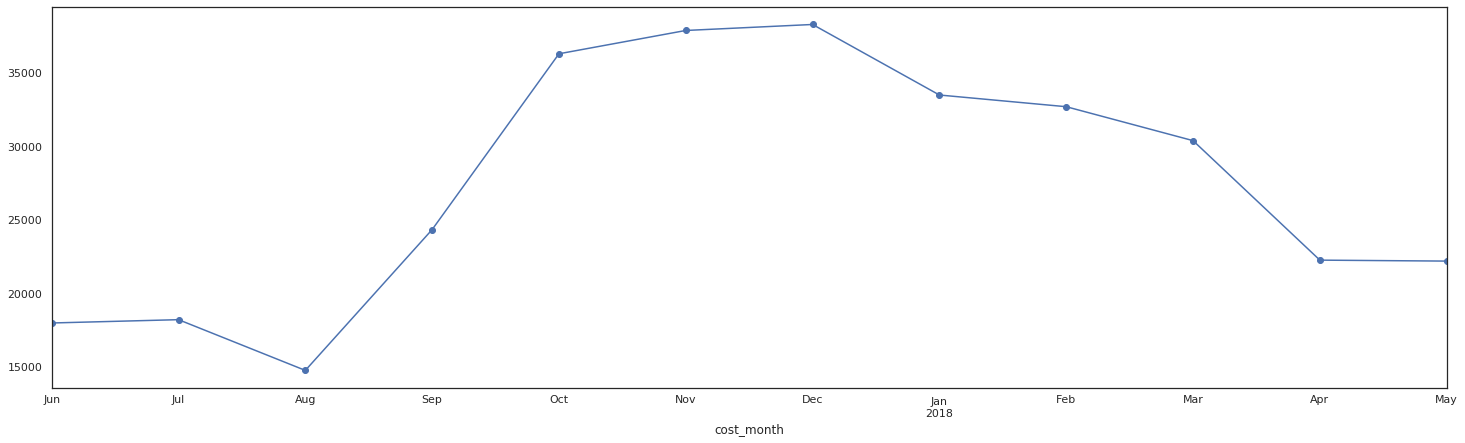

In [23]:
df_costs['cost_month'] = df_costs['dt'].astype(
    'datetime64[M]'
)
cost_per_month = df_costs.groupby('cost_month')['costs'].sum()
cost_per_month.plot(y='costs', style='-o', figsize=(25,7))

Наибольшие траты на рекламную компанию пришлись на декабрь, скорее всего это связано с наступающим новым годом и желанием продать как можно больше продукции в новогодние дни. 
#### CAC

In [24]:
cac = (df_costs['costs'].sum()) / (df_orders['uid'].nunique())
print('Cтоимость привлечения клиента:', cac)

Cтоимость привлечения клиента: 9.011626098622786


,source_id,costs,uid,cac
0,1,20833.27,16153,1.289746
1,2,42806.04,19063,2.245504
2,3,141321.63,18001,7.850766
3,4,61073.60,22011,2.774685
4,5,51757.10,14808,3.495212
5,9,5517.49,4794,1.150916
6,10,5822.49,2563,2.271748


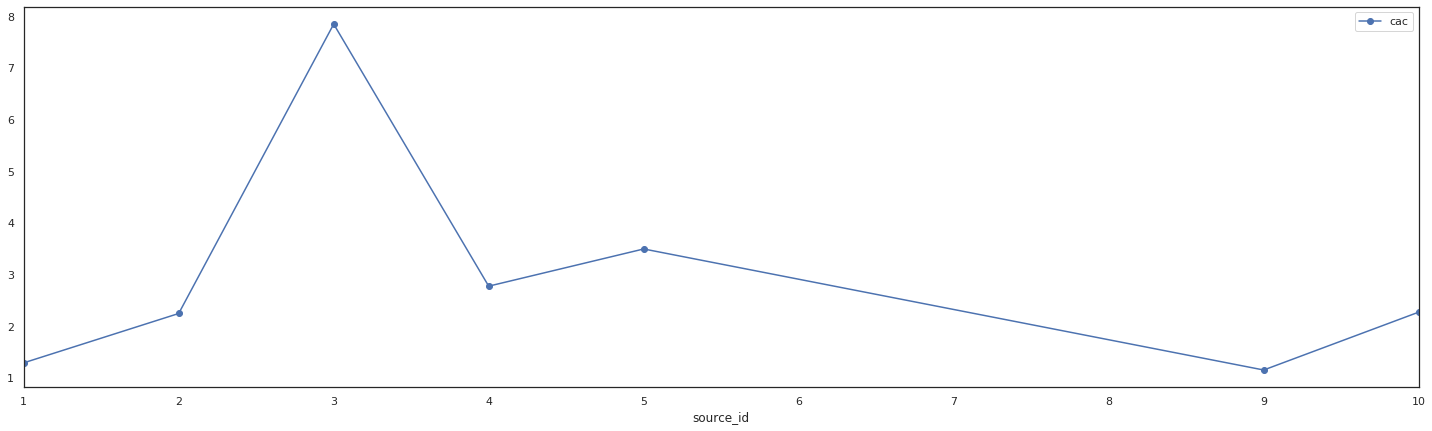

In [25]:
df_uid = pd.DataFrame({'uid':df_orders['uid'].unique()})
df_uid_source = pd.DataFrame({'uid':df_visits['uid'], 
                              'source_id':df_visits['source_id']})
df_uid = df_uid.merge(df_uid_source, on='uid', how='left')

df_users_source = df_uid.groupby('source_id')['uid'].count()
cost_per_sourse = cost_per_sourse.reset_index()
df_users_source = df_users_source.reset_index()
cost_per_sourse = cost_per_sourse.merge(df_users_source, on='source_id')
cost_per_sourse['cac'] = cost_per_sourse['costs'] / cost_per_sourse['uid']
cost_per_sourse.plot(y='cac', x='source_id', style='-o', figsize=(25,7))
display(cost_per_sourse)

Пик САС приходится на маркетинговую компанию с id равным трем, а вот наименьшая сумма привлечения пользователя у источника с id 9

#### ROMI

Так как у нас разные источники привлечения клиентов, и соответсвтенно разные траты на эти самые источники, то проведем когортный анализ ROMI для каждого из них. 

источник 1:
источник 2:
источник 3:
источник 4:
источник 5:
источник 9:
источник 10:


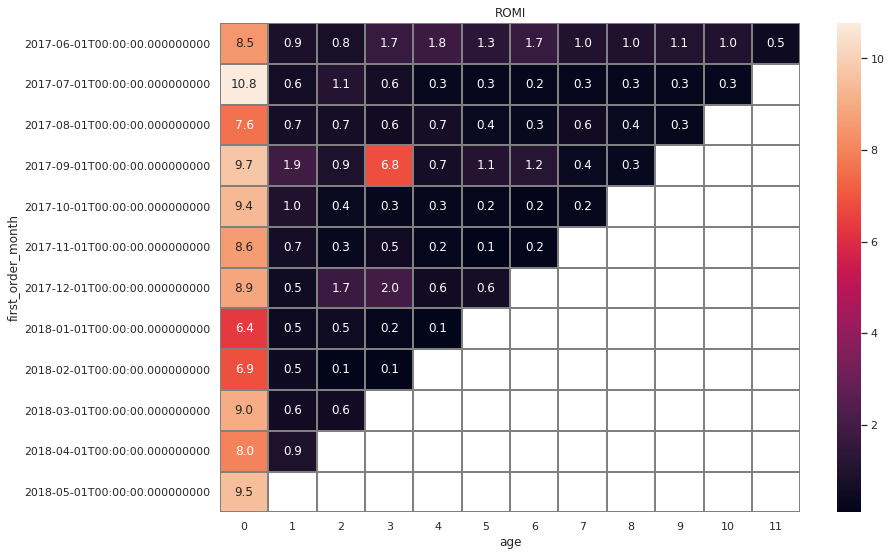

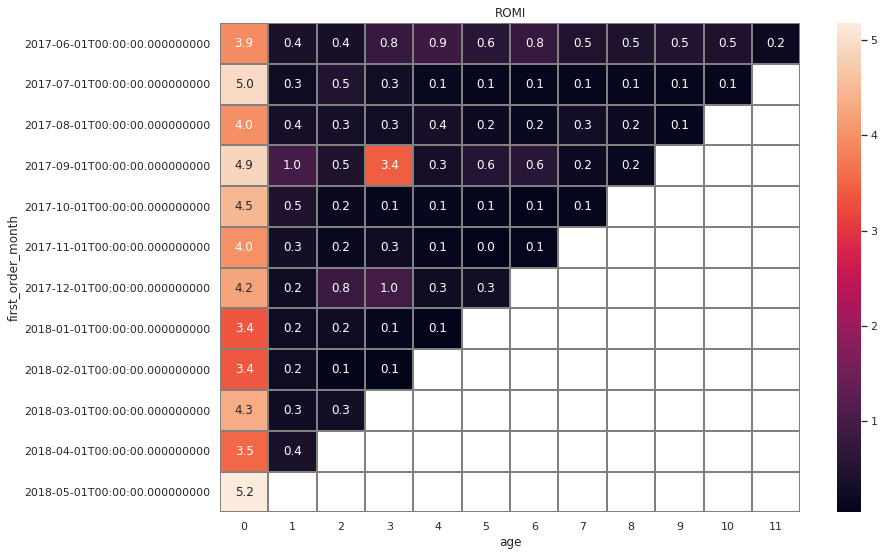

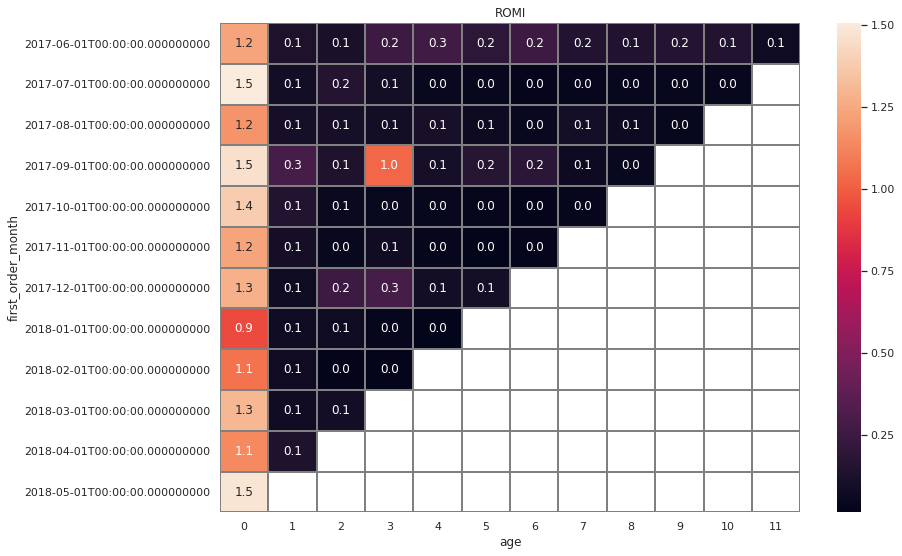

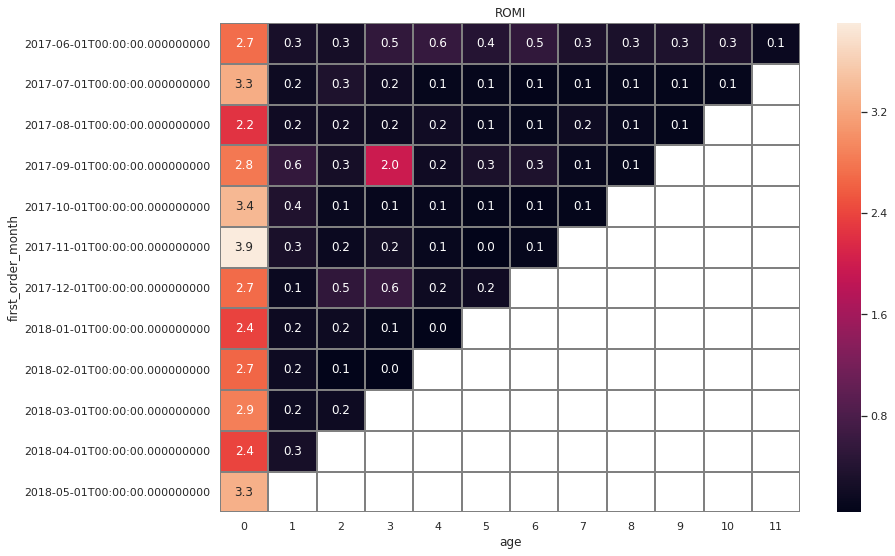

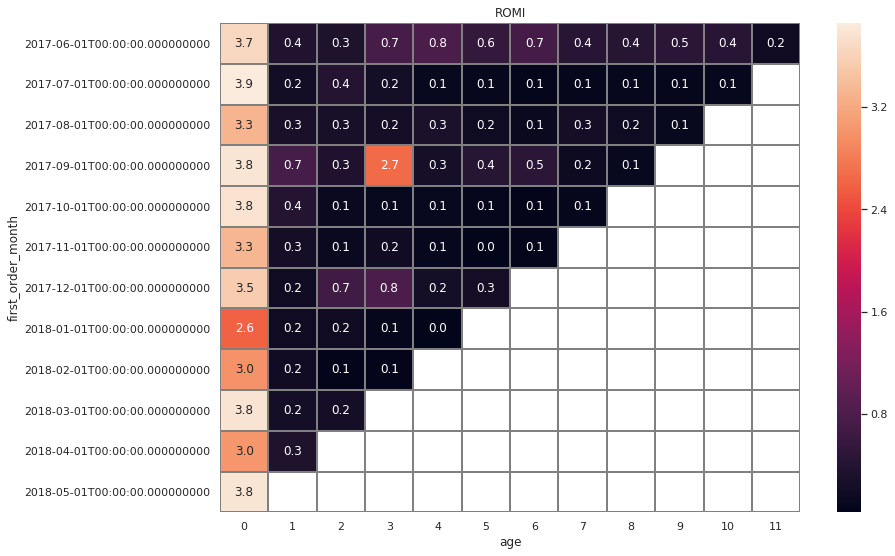

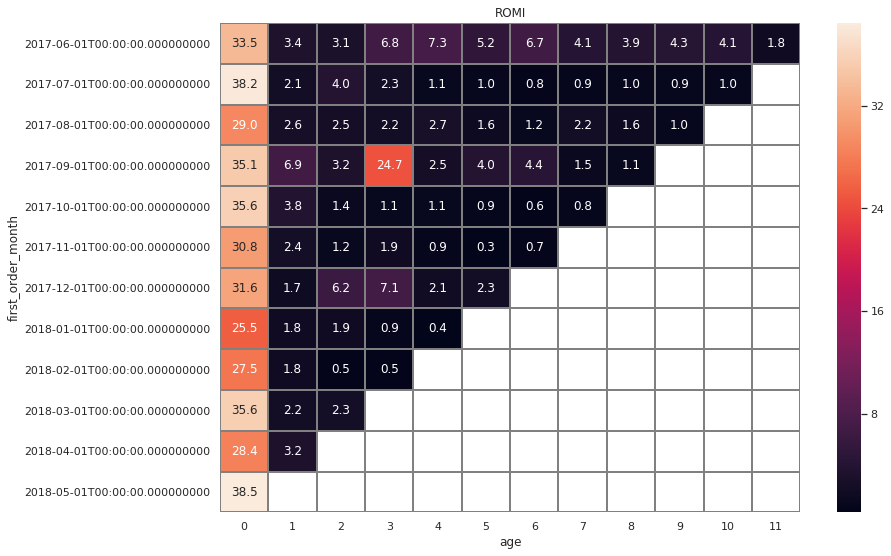

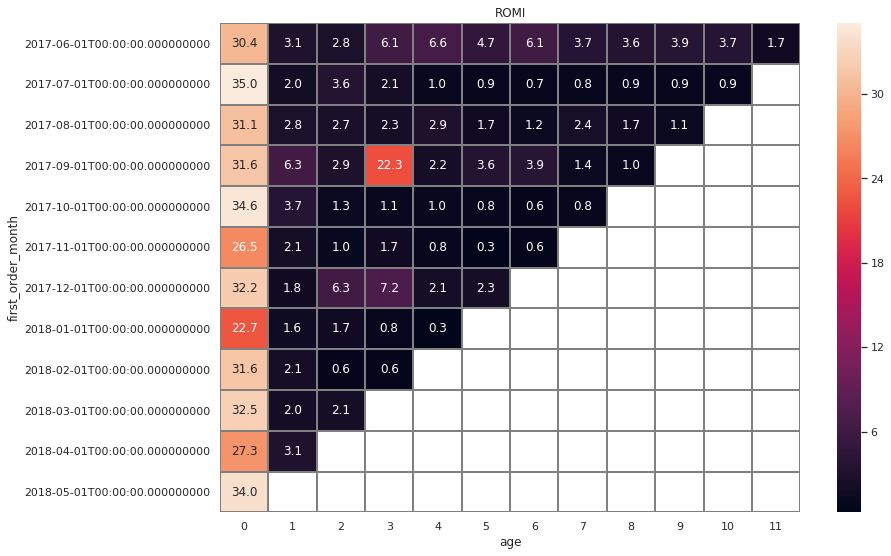

In [26]:
sources = [1, 2, 3, 4, 5, 9 ,10]
df_costs['month'] = df_costs['dt'].astype('datetime64[M]') 
sources_names = ['источник 1:', 
                 'источник 2:',
                 'источник 3:',
                 'источник 4:',
                 'источник 5:',
                 'источник 9:',
                 'источник 10:']
result = result.fillna('') 
for i,j in zip(sources, sources_names):
    df_costs_source = df_costs[df_costs['source_id'] == i] 
    monthly_costs = df_costs_source.groupby('month').sum()
    report_new3 = pd.merge(
        report, monthly_costs, left_on='first_order_month', right_on='month'
    )
    report_new3['cac'] = report_new3['costs'] / report_new3['n_buyers']
    report_new3['romi'] = report_new3['ltv'] / report_new3['cac']
    output = report_new3.pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    )
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('ROMI')
    print(j)
    sns.heatmap(output, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

Источники, которые по настоящему окупаются - те, что с id 9 и 10, на остальные маркетологам стоит уделить больше внимания или вовсе от них отказаться. 

## Выводы и рекомендации

### Источники трафика

Наибольшее количество затрат приходится на маркетинговую компанию с id три, при этом эти расходы абсолютно не окупаюся. Однако хочется обратить внимание на маркетинговые компании с id 9 и 10: на них тратиться наименьшее количество денег, однако они окупаются в первый же месяц формирования когорт. В связи с чем стоит пересмотреть необходимость в других источниках или проверить, что является причиной так жутких показателей: а именно полной не окупаемости. 

### Выводы относительно метрик каждого вида:
#### Продуктовые метрики
Что касается активности пользователей: показатели очень хорошие за любой взятый период, очень большой поток новых пользователей. Наблюдается сильный подъем к концу 2017 года, такой ярый интерес к продукции сайта наверно связан с тем, что люди приобретали билеты в качестве подарков на новый год или самостоятельно куда то выбирались на период новогодних праздников, покупая билеты заранее. Потом показатели идут на спад, но ведь и под конец, а именно в последний месяц наблюдений, данные вообще содержат всего одну покупку, поэтому наверное спад связан с тем, что полученные таблицы не содержат в себе информации на период окончания наблюдений. 

В среднем пользователь заход на сайт чуть больше одного раза в день, а тепичная сессия длится около 60 секунд, вполне реальная ситуация для покупки билетов, ведь зачастую пользователь заранее знает, на что он хочет сходить, поэтому сразу оформляет заказ. А вот Retention Rate очень низкий, пользователи почти не возвращаются на сайт. 
#### Метрики электронной коммерции
Время с момента первого посещения сайта до совершения покупки равно времени типичной пользовательской сессии и составляет 60 секунд. Не сказать, что это плохо, потому что очень часто люди заранее определяются с выбором, куда они хотят сходить, и просто покупают билеты, хотя, конечно, в идеале продлить это время, чтоб пользователь именно на этом сайте знакомился с текущим репертуаром и выбирал, что он хочет посетить, и тогда, скорее всего, с таким подходом продажи возрастут еще сильнее, потому что на данный момент на одного пользователя приходится всего чуть больше одной покупки, да и тот же Retention Rate поднимится. 

Самый большой средний чек приходится на декабрьскую когорту, что хочется связать с новогодними праздниками, а вот самые высокии показатели LTV напротив у июньской и сентябрьской когорт, что наверное как то можно связать с началом и окончанием учебного года, но для этого необходимо проводить дополнительный анализ. 
#### Маркетинговые метрики
На маркетинг тратится далеко не малая сумма: большая часть идет на источник с id 3, который, как и 4 других, совсем не окупается, в связи с чем и CAC у них такой высокий, ведь денег тратиться много, а пользователей приходит мало, да еще и тратят они не достаточно, чтоб окупить их привлечение на сайт. Чего не сказать про источники 9 и 10: на них тратится чуть ли не наименьшее количество денег, а доходность с них самая высокая согласно ROMI. 

### Итоги когортного анализа
Самые выгодные кагорты - те, что образованы в июне и сентябре. Во-первых, пользователи из этих кагорт охотнее всего возвращаются на сайт, а, во-вторых, они быстрее всего себя окупили, судя по источникам привлечения с id 9 и. 10. 